# Phenotypic variance

$$
\newcommand{\Bin}{\operatorname{Bin}}
\newcommand{\Var}{\operatorname{Var}}
\newcommand{\Cov}{\operatorname{Cov}}
\newcommand{\Cor}{\operatorname{Cor}}
\newcommand{\E}{\operatorname{E}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\tr}{\operatorname{tr}}
$$

When dealing with normalized genotypes (i.e. centered to have mean=0 and scaled to have variance=1), the notions of variance and heritability are fairly easy to deal with.

$$
\begin{align}
Y & = W^T \beta + e = \sum W_i \beta_i + e \\
\Var \left( Y \right)
  & = \Var \left(\sum W_i \beta_i + e \right) \\
  & = M \Var \left( W_i \beta_i \right) + \Var \left( e \right) && IID \\
  & = M \Var \left( W_i \right) \Var \left( \beta_i \right) + \Var \left( e \right) && W_i \perp \beta_i, \E \left( W_i \right) = \E \left( \beta_i \right) = 0 \\
  & = M \sigma^2_\beta + \sigma^2_e = \sigma^2_g + \sigma^2_e && \Var \left( W_i \right) = 1 \\
h^2_g & = \frac { \sigma^2_g } { \sigma^2_g + \sigma^2_e }
\end{align}
$$

With only centered genotypes, this is no longer so easy because $X_i$ aren't IID - the variance is a function of allele frequency.

$$
\begin{align}
\Var \left( Y \right) & = \Var \left( \sum X_i b_i + e \right) \\
  & = \sum \Var \left( X_i b_i \right) + \Var \left( e \right) \\
  & = \sum \Var \left( X_i \right) \Var \left( b_i \right) + \Var \left( e \right) \\
  & = \sum 2 p_i \left( 1-p_i \right) \sigma^2_b + \sigma^2_e \\
\end{align}
$$

In [1]:
%run 'library.ipynb'

In [2]:
def test_phenotypic_variance(M=100, N=None):
    if (N is None):
        N = 10*M
    
    p = nr.uniform(0.05, 0.95, M)
    G = np.array([nr.binomial(2,pi, N) for pi in p])
    b = nr.normal(size=M)
    Y = G.T.dot(b)
    return(Y.var(), (2*p*(1-p)).sum())

In [3]:
nr.seed(0)
runs = pd.DataFrame([test_phenotypic_variance() for i in range(1000)],
                    columns=['empirical', 'theoretical'])

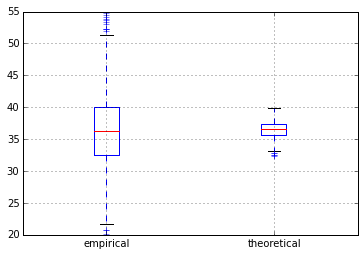

In [4]:
runs.boxplot(return_type='axes')
plt.show()